# Научная графика в Python

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

URL: [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

Дата последнего обновления: 12.03.2017

In [48]:
# Преамбула
%matplotlib inline

import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

import numpy as np

def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = './pictures/{}'.format(fmt)
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()

rcParams['font.family'] = 'fantasy'
rcParams['font.fantasy'] = 'Arial'

## Глава 5 Рисунок Figure


### Содержание главы

1. Контейнер Figure;

2. Конфигурация Figure;

3. Сохранение рисунка.

Рисунок **Figure** является основой каждого изображения, которые создаётся в matplotlib. Обычно после создания экземпляра рисунка (точнее - экземпляра класса matplotlib.figure.Figure) о нём можно забыть. Тем не менее, именно на основе экземпляра Figure вызываются экземпляры Axes, которые несут основную нагрузку при создании научной графики.

Стоит помнить, что пока идёт работа с одним единственным экземпляром типа Figure, то результат выполнения всех графических команд будут отображаться именно на нём. При работе со многими экземплярами Figure нельзя забывать об очищении "холста" от "красок" предыдущиего рисунка.

### Электронные ресурсы:

+ [Описание элементов рисунка Artists в matplotlib](http://matplotlib.org/users/artists.html).

### 5.1 Контейнер Figure

Верхним логическим уровнем среди контейнеров Artists (см. Главу 1) является matplotlib.figure.Figure, который включает всё, что есть на рисунке (figure). Фоном (background) рисунка, который определяетя в Figure.patch, по умолчанию является прямоугольник (Rectangle). Когда на рисунке добавляются экземпляры subplots (например, с помощью метода add_subplot()) или axes (с помощью метода add_axes()), они автоматически добавляются в список Figure.axes. Так как matplotlib поддерживает концепцию "текущей области" ("current axes"; подробнее см. Figure.gca и Figure.sca) для работы с pylab/pyplot, то не рекомендуется добавлять или убирать axes из списка (axes list) вручную. Лучше использовать методы add_subplot()/add_axes() для добавления экземпляров Axes и delaxes() для их удаления. 

**Совет**

> Можно использовать список fig.axes() для работы с экземплярами Axes. Например, для добавления линий сетки с помощью метода grid() на все axes рисунка.

<class 'matplotlib.figure.Figure'>


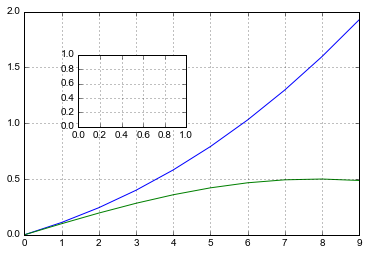

In [49]:
# Пример 5.1

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

print type(fig)
# Создание экземпляра Axes c помощью Figure-метода add_subplot()
ax = fig.add_subplot(111)
# или так
box = [0.25, 0.5, 0.25, 0.25]
# Создание экземпляра Axes c помощью Figure-метода add_axes()
ax2 = fig.add_axes(box)

x = np.arange(0.0, 1.0, 0.1)
y = np.sin(x)*np.exp(x)
z = np.cos(x)*np.sin(x)

# Методы plot() вызываются через экземпляры ax, а не plt (интерфейс pyplot)
ax.plot(y)
ax.plot(z)

for ax in fig.axes:
    ax.grid(True)
    
save('pic_5_1', fmt='png')
save('pic_5_1', fmt='pdf')
    
plt.show()

Список элементов рисунка (Artists) для контейнера Figure:

1. **axes** - список экземпляров Axes (включая Subplot);

2. **images** - список FigureImages patches (эффективно для отображения пикселей);

3. **legends** - список экземпляров Figure Legend (отличается от Axes.legends);

4. **lines** - список экземпляров Figure Line2D (редко используется, см. Axes.lines);

5. **patch** - фон Rectangle;

6. **patches** - список Figure patches (редко используется, см. Axes.patches);

7. **texts** - список экземпляров Figure Text.

### 5.2 Конфигурация Figure

Одним из стандартных методов создания экземпляра Figure является следующий:

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure()
print(u'Тип Figure %s' % type(fig))

Тип Figure <class 'matplotlib.figure.Figure'>


Основные параметры созданного экземпляра Figure определяются в конфигурационном файле matplotlibrc. Атрибуты Figure можно изменить во время создания экземпляра:

+ **figsize** : кортеж из целых или действительных чисел, который определяет ширину и высоту в дюймах. По умолчанию равен значению figure.figsize из настроек rcParams;

+ **dpi** : разрешение рисунка. По умолчанию равен значению figure.dpi из настроек rcParams;

+ **facecolor** : цвет фона. По умолчанию равен значению figure.facecolor из настроек rcParams;

+ **edgecolor** : цвет границы. По умолчанию равен значению figure.edgecolor из настроек rcParams.

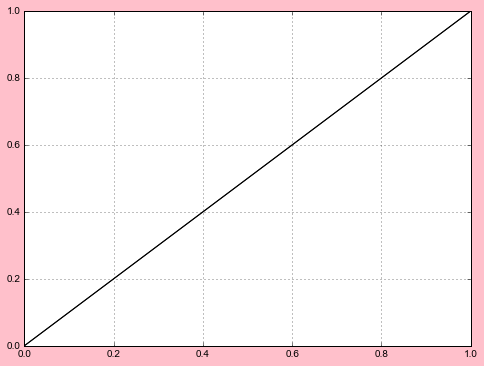

In [51]:
# Пример 5.2.1

import matplotlib.pyplot as plt
from matplotlib import rcParams

figsize = (8,6)

fig = plt.figure(figsize=figsize, facecolor='pink', frameon=True)
plt.plot([[0.0,0.0],[1.,1.]],'k')
plt.grid(True)
rcParams['figure.edgecolor'] = 'blue'

save('pic_5_2_1', fmt='png')
save('pic_5_2_1', fmt='pdf')

plt.show()

По умолчанию цвета координатной координатных осей, линий вспомогательной сетки отрисовываются чёрным цветом, а цвет фона (основы рисунка) - белым. Заменив параметры, отвечающие за соответствующие цвета, можно создать, например, инвертированный бело-чёрный рисунок. Иногда такая графика смотрится очень наглядно, стильно и привлекает к вашему материалу повышенное внимание.

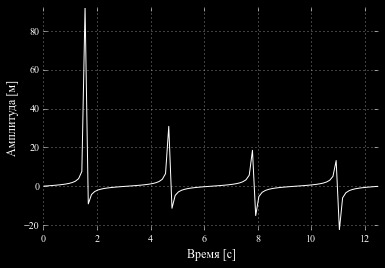

In [52]:
# Пример 5.2.2

from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

rcParams['font.family'] = 'Times New Roman', 'Arial', 'Tahoma'
rcParams['font.fantasy'] = 'Times New Roman'

# Изменение параметров рисования (смена чёрного по белому на белое по чёрному)
facecolor = 'k'

rcParams['figure.edgecolor'] = facecolor
rcParams['figure.facecolor'] = facecolor
rcParams['axes.facecolor'] = facecolor
#rcParams['axes.edgecolor'] = 'k'
rcParams['grid.color'] = 'w'
rcParams['xtick.color'] = 'w'
rcParams['ytick.color'] = 'w'
rcParams['axes.labelcolor'] = 'w'

x = np.arange(0, 4*np.pi, 0.12)
y = np.tan(x)

fig = plt.figure()
plt.plot(x, y,'w')

plt.xlim(x[0], x[-1])
plt.ylim(np.min(y), np.max(y))

plt.xlabel(u'Время [c]', fontsize=12)
plt.ylabel(u'Амплитуда [м]', fontsize=12)
plt.grid(True, color='w')

save('pic_5_2_2', fmt='png')
save('pic_5_2_2', fmt='pdf')

plt.show()

### 5.3 Сохранение рисунка

Сохранить получившийся рисунок можно с помощью метода savefig, применённого либо к экземпляру Figure (fig.savefig()), либо через pyplot (plt.savefig()). 

Стоит помнить, что по умолчанию метод savefig имеет значения атрибутов типа facecolor отличные от значений figure.facecolor. В конфигурационном файле matplotlibrc можно настроить соответствующие параметры как для savefigure, так и для figure. Поэтому чтобы сохранить пользовательские настройки рисунка методом savefig, нужно изменить атрибуты savefig, а не соответствующие атрибуты figure (dpi, format, edgecolor, facecolor, frameon) или передать соответствующие значения атрибутов явно при вызове метод savefig:

In [53]:
# Сохранение рисунка с параметрами цвета фона по умолчанию

rcParams['savefig.edgecolor'] = 'k'
rcParams['savefig.facecolor'] = 'k'
rcParams['grid.color'] = 'w'
rcParams['xtick.color'] = 'w'
rcParams['ytick.color'] = 'w'
rcParams['axes.labelcolor'] = 'w'

fig.savefig('./pictures/png/pic_5_3_1.png', format='png')
fig.savefig('./pictures/png/pic_5_3_1.pdf', format='pdf')

# Сохранение рисунка с пользовательскими параметрами цвета фона
rcParams['savefig.edgecolor'] = 'w'
rcParams['savefig.facecolor'] = 'w'
rcParams['grid.color'] = 'k'
rcParams['xtick.color'] = 'k'
rcParams['ytick.color'] = 'k'
rcParams['axes.labelcolor'] = 'k'

# Атрибут facecolor передаётся явно
fig.savefig('./pictures/png/pic_5_3_2.png', format='png', facecolor='k')
fig.savefig('./pictures/png/pic_5_3_2.pdf', format='pdf', facecolor='k')

figure.facecolor : k


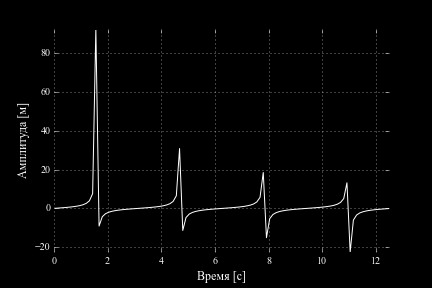

In [54]:
print ('figure.facecolor : %s' % rcParams['figure.facecolor'])

from IPython.display import Image
#Image(filename='pic example 5_3_1.png')
Image(filename='./pictures/png/pic_5_3_1.png')

figure.facecolor : k


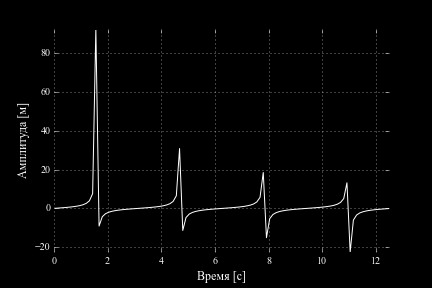

In [55]:
from IPython.display import Image

print ('figure.facecolor : %s' % rcParams['figure.facecolor'])

# Здесь атрибут facecolor был передан явно(figure.facecolor='k')
Image(filename='./pictures/png/pic_5_3_2.png')

Так как для сохранения рисунков методом savefig требуется явно задать некоторые атрибуты, то среди атрибутов при создании экземпляра Figure имеет смысл задавать те, которые не являются входящими для метода savefig, а именно figsize. Figsize позволяет сделать рисунок меньше или больше и определяет физический размер рисунка. Так можно подобрать нужный размер для печати. 

Для справки:

> 1 дюйм = 2.54 см

> Лист А4 имеет размеры 210x297 мм

Разрешение рисунка можно получить умножив значения атрибутов figure.figsize и figure.dpi. DPI показывает сколько точек-пикселей приходится на один дюйм.

[8.89, 6.35]


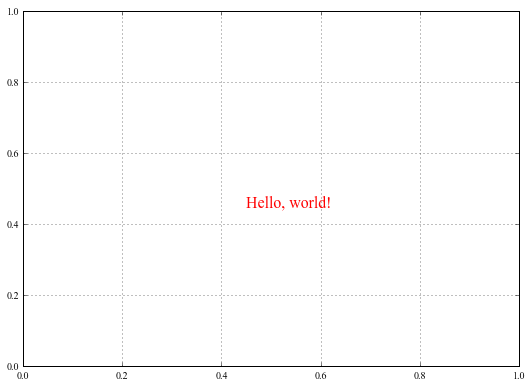

In [56]:
# Пример 5.3.3

from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

def sm2inch(a):
    '''
    Converts inches to santimeters
    '''
    b = []
    for i in a:
        b.append(i/2.54)
    return b

# Возвращаем обычные значения цветов для дальнейшей интерактивной работы

rcParams['figure.edgecolor'] = 'w'
rcParams['figure.facecolor'] = 'w'
rcParams['axes.facecolor'] = 'w'
rcParams['axes.edgecolor'] = 'k'
rcParams['grid.color'] = 'k'
rcParams['xtick.color'] = 'k'
rcParams['ytick.color'] = 'k'
rcParams['axes.labelcolor'] = 'k'

figsize = (3.5, 2.5) # см
figsize = sm2inch(figsize)
print figsize
fig2 = plt.figure(figsize=figsize, facecolor='w')
rcParams['figure.edgecolor'] = 'w'
plt.text(0.45, 0.45,'Hello, world!', color='red', fontsize=16)
plt.grid(True)

save('pic_5_3_3', fmt='png')
save('pic_5_3_3', fmt='pdf')

plt.show()

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

## Научная графика в Python

### Оглавление

+ [Глава 1 Библиотека matplotlib. Pyplot](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 1 Pyplot.ipynb)

+ [Глава 2 Основные графические команды](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 2 Main graphical commands.ipynb)

+ [Глава 3 Работа с текстом и шрифтами](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 3 Text and Fonts.ipynb)

+ [Глава 4 Цвет и цветовая палитра](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 4 Color.ipynb)

**Часть II Структура рисунка в matplotlib**

> + [Глава 5 Рисунок](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 5 Figure container.ipynb)

+ [Глава 6 Область рисования](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 6 Axes container.ipynb)

+ [Глава 7 Мультиоконные рисунки](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 7 Subplots.ipynb)

+ [Глава 8 Координатные оси](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 8 Axis container.ipynb)

+ [Глава 9 Деления координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 9 Ticks container.ipynb)

**Часть III Специальные элементы рисунка в matplotlib**

+ [Глава 10 Особенности координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 10 Twinx and log scale.ipynb)

+ [Глава 11 Графики в полярной системе координат](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 11 Polar plots.ipynb) 

+ [Глава 12 Легенда](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 12 Legends.ipynb)

+ [Глава 13 Цветовая шкала](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 13 Colorbar.ipynb)